# Questions 3

Does the density of restaurants affect the average number of stars?

In [6]:
import pandas as pd
import s2sphere
import ProcessData as p
from IPython.display import Image

In [3]:
# Functions
def get_s2_from_lat_lng(row, level):
    """Gets the S2 cell at the specified level for a lat
        args:
            row - dataframe row with latitude and longitude columns
            level - S2 cell level
    """
    cellid = s2sphere.CellId.from_lat_lng(
            s2sphere.LatLng.from_degrees(row.latitude, row.longitude)
            )
    return cellid.parent(level).to_token()

def get_s2s(df, level):
    """Returns the dataframe with a column with the s2 cell at a specified level"""
    return df.apply(get_s2_from_lat_lng, axis=1, args=[level])

In [ ]:
# Read in data   
business_file = 'yelp_dataset/yelp_academic_dataset_business.json'
business_df = pd.read_json(business_file, lines=True)

## Data Understanding

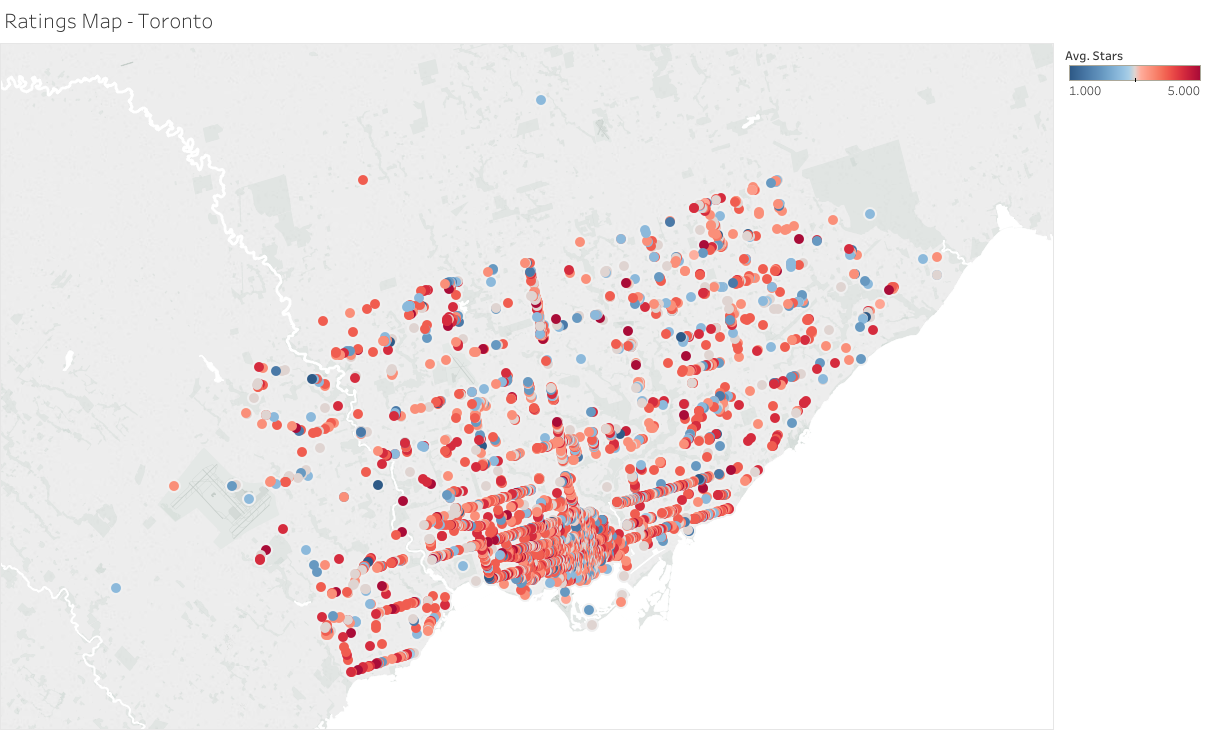

In [5]:
Image("Ratings Map - Toronto.png")

To help visualize how the ratings and density are related the data was exported to csv and loaded into Tableau. The map does not seem to indicate any relationship between the two but we can determine this more precisely.

## Data Preparation

In [3]:
categories = ['Restaurants']
business_df = p.process_business(business_df, categories)

In [4]:
# Get the S2 cell that the business is in
business_df.dropna(subset=['latitude','longitude'], inplace=True)

#level = 14
level = 13
#level = 12
s2_col = 's2_'+str(level)
business_df[s2_col] = get_s2s(business_df, level)

In [5]:
# Subset for only business that are resturants and are open
restaurants_df = business_df[(business_df.Restaurants == True) & (business_df.is_open == True)]
restaurants_df.sort_values(by=[s2_col]).head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,Restaurants,s2_13
21939,"Av. do Mar, 30","{'GoodForKids': 'True', 'RestaurantsGoodForGro...",5DOBUoPktsv2ROoC5tD4ng,"Italian, Restaurants, Pizza",Ferrel,"{'Monday': '17:0-23:0', 'Wednesday': '17:0-23:...",1,39.365027,-9.319794,Cantina de Ferrel,...,True,False,False,False,True,False,False,False,True,0d1f4ed4
65898,"Calle Bodega, 22","{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",QszIJxJEczxgescw__XzOg,"Gastropubs, Beer Bar, Nightlife, Bars, Restaur...",Los Molinos,"{'Monday': '19:30-2:30', 'Tuesday': '19:30-2:3...",1,40.714906,-4.071901,El Taller de Cerveza,...,True,2,True,True,True,outdoor,True,free,True,0d410d4c
58342,"Carretera San Juan de Plan, 7","{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",j6Pjn7vmWvQPIPHBizbD_w,"French, Cafeteria, Spanish, Restaurants",Plan,"{'Tuesday': '13:0-15:30', 'Wednesday': '13:0-1...",1,42.580316,0.336305,La Capilleta,...,True,False,False,False,False,False,False,False,True,12a87504
165141,14 Avenue du Lauragais,None,L8psDqzHfAb3TblNY2LpDw,"Restaurants, French",MontrÃ©al De L'aube,None,1,43.240779,2.103968,Auberge du Dominicain,...,False,False,False,False,False,False,False,False,True,12ae497c
162395,Piazza Guglielmo Marconi 17,"{'Alcohol': 'beer_and_wine', 'GoodForKids': 'T...",s1AV8syKiWbuKDHTWGocwg,"Italian, Restaurants, Cafes",SP,None,1,44.135054,9.682703,Ananasso Bar,...,True,2,False,False,True,False,False,False,True,12d4f02c


In [6]:
# Get the counts and average stars for each s2 cell
count = restaurants_df.groupby(by=s2_col)['stars'].count()
stars = restaurants_df.groupby(by=s2_col)['stars'].mean()

s2s = pd.DataFrame({'count':count, 'stars':stars})

In [7]:
s2_summary = s2s.sort_values(by=['count'], ascending=False)
print(s2_summary.head())
print(s2_summary.tail())

          count     stars
s2_13                    
882b34cc    284  3.318662
4cc91a44    249  3.483936
882b34d4    221  3.264706
882b34c4    210  3.464286
89d4cb34    199  3.301508
          count  stars
s2_13                 
882b222c      1    3.5
882b2344      1    1.5
882b23b4      1    4.0
882b2424      1    4.0
b0c25b9c      1    4.0


In [8]:
restaurants_df[restaurants_df[s2_col] == s2_summary.iloc[0].name]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,Restaurants,s2_13
1323,Eaton's Centre,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",qqU3d8IpcIw2BJrsGxSL9Q,"Restaurants, Chinese",Toronto,None,1,43.654463,-79.380665,Schezuan Express,...,False,2,False,False,True,False,False,no,True,882b34cc
1364,595 Bay Street,"{'BusinessAcceptsCreditCards': 'True', 'NoiseL...",wHTPHng-wWg85AF_y8IDuQ,"Restaurants, Food Stands",Toronto,None,1,43.655904,-79.383606,Feta & Olives,...,False,False,False,False,False,False,False,False,True,882b34cc
1966,655 Bay Street,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",ynmTXY9yJDiNkO4HUmxRSQ,"Asian Fusion, Japanese, Sushi Bars, Restaurants",Toronto,"{'Monday': '16:30-23:0', 'Tuesday': '16:30-23:...",1,43.657396,-79.384224,KaKa All You Can Eat,...,True,3,True,True,True,False,False,free,True,882b34cc
2894,1 Dundas Street W,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",LBHbyID7tcaGszznHtnCrw,"Canadian (New), Nightlife, Bars, Sports Bars, ...",Toronto,"{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",1,43.655417,-79.381827,JOEY Eaton Centre,...,True,2,True,True,True,no,True,free,True,882b34cc
3209,,"{'Alcohol': 'none', 'BikeParking': 'True', 'Bu...",8IqVdS0q-JpzZc1-it4lRg,"American (Traditional), Restaurants, Food, Foo...",Toronto,None,1,43.653226,-79.383184,Food Cabbie,...,False,1,False,False,True,False,True,no,True,882b34cc
3398,33 Elm St,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",6eRSdODyj9GS0w6zlhrWkg,"Restaurants, Spanish, Portuguese",Toronto,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,43.657311,-79.383229,Adega Restaurante,...,True,3,True,True,False,False,False,no,True,882b34cc
4662,218 Yonge Street,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",dm2qhNgxjKGE9GvcfSPD2Q,"Restaurants, Bars, Nightlife, American (Tradit...",Toronto,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,43.655536,-79.380934,Hendriks Restaurant & Bar,...,True,3,True,True,True,no,True,free,True,882b34cc
5262,322 Yonge Street,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",i1bwc_MLGgOIJ8S0r2uu2w,"Bagels, Restaurants, Breakfast & Brunch, Food,...",Toronto,"{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",1,43.657114,-79.381534,Panera Bread,...,True,2,False,False,True,False,False,free,True,882b34cc
6300,183 Dundas Street W,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",FCKexdb00Z0A8IJHjiaAxw,"Japanese, Restaurants",Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.654970,-79.386574,Ken Oh,...,True,2,True,True,True,False,False,no,True,882b34cc
6758,525 University Avenue,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",QVI1gM-_PAhQx_DSjz9akQ,"Mexican, Halal, Restaurants",Toronto,"{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...",1,43.656362,-79.388793,Mr Burrito Plus,...,False,1,False,False,True,False,False,no,True,882b34cc


## Model

In [9]:
# Correlation
s2s.corr()

,count,stars
count,1.000000,-0.030704
stars,-0.030704,1.000000


## Results

It appears there is not correlation between density and star rating. This confirms what we visually suspected.